In [36]:
import os
import pandas as pd
import numpy as np


dfs = {}

ruta = os.path.join('..', 'data')

years = range(2019, 2024)

for year in years:
    file_path = os.path.join(ruta, f'{year}clean.csv')  # crea la ruta al archivo
    dfs[f'df{year}'] = pd.read_csv(file_path)  # lee el archivo CSV y lo almacena en el diccionario

df2019 = dfs['df2019']
df2020 = dfs['df2020']
df2021 = dfs['df2021']
df2022 = dfs['df2022']
df2023 = dfs['df2023']

df2019['año']=2019
df2020['año']=2020
df2021['año']=2021
df2022['año']=2022
df2023['año']=2023


/var/folders/n1/5l3l1c6x5xd7lfxmx1cmr21c0000gn/T/ipykernel_21458/3590503151.py:14: DtypeWarning: Columns (6,20,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[f'df{year}'] = pd.read_csv(file_path)  # lee el archivo CSV y lo almacena en el diccionario
/var/folders/n1/5l3l1c6x5xd7lfxmx1cmr21c0000gn/T/ipykernel_21458/3590503151.py:14: DtypeWarning: Columns (6,20,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[f'df{year}'] = pd.read_csv(file_path)  # lee el archivo CSV y lo almacena en el diccionario
/var/folders/n1/5l3l1c6x5xd7lfxmx1cmr21c0000gn/T/ipykernel_21458/3590503151.py:14: DtypeWarning: Columns (6,7,20,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[f'df{year}'] = pd.read_csv(file_path)  # lee el archivo CSV y lo almacena en el diccionario
/var/folders/n1/5l3l1c6x5xd7lfxmx1cmr21c0000gn/T/ipykernel_21458/3590503151.py:14: DtypeWarning: Columns (6,20,42) have mixed ty

In [37]:
# Crear una lista de dataframes
dfs_list = [dfs[name] for name in dfs.keys()]

# Concatenar todos los dataframes
contratos_df = pd.concat(dfs_list, ignore_index=True)

contratos_df


,orden_de_gobierno,siglas_de_la_institucion,institucion,clave_de_la_uc,nombre_de_la_uc,responsable_de_la_uc,codigo_del_expediente,referencia_del_expediente,clave_cucop,titulo_del_expediente,...,folio_en_el_rupc,rfc,proveedor_o_contratista,estratificacion_de_la_empresa,clave_del_pais_de_la_empresa,rfc_verificado_en_el_sat,credito_externo,organismo_financiero,direccion_del_anuncio,año
0,GE,COAH,_Gobierno del Estado de Coahuila de Zaragoza,905011981,COAH-Secretaría de Fiscalización y Rendición d...,Jesús Fernando Ramos Flores,109177,NaN,5410,CAMIONETA TIPO PICK UP y AUTOMOVIL SEDAN LA-9...,...,"51,528.0",ACO740701LH0,AUTOMOTORES COAHUILENSES SA DE CV,Mediana,MX,1,NaN,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2019
1,GE,COAH,_Gobierno del Estado de Coahuila de Zaragoza,905011981,COAH-Secretaría de Fiscalización y Rendición d...,Jesús Fernando Ramos Flores,109177,NaN,5410,CAMIONETA TIPO PICK UP y AUTOMOVIL SEDAN LA-9...,...,NaN,SMA0301178T2,SIERRA MADRE AUTOMOTRIZ SA DE CV,Pequeña,MX,1,NaN,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2019
2,GE,OAX,_Gobierno del Estado de Oaxaca,920042983,OAX-Servicios de Salud de Oaxaca-DIRECCION DE ...,Alejandro Abel Reyes Gonzales,166546,NaN,6220,FONDEN/2012,...,NaN,CBA050209974,CONSTRUCTORA BARRITA Y ASOCIADOS SA DE CV,Mediana,MX,1,NaN,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2019
3,GE,OAX,_Gobierno del Estado de Oaxaca,920042983,OAX-Servicios de Salud de Oaxaca-DIRECCION DE ...,Alejandro Abel Reyes Gonzales,215434,"PEÑA NEGRA NOPALERA, SAN SEBASTIAN MONTEVERDE",6120,PEÑA NEGRA NOPALERA,...,NaN,JAIME DAVID BRANDON GRACIDA,NaN,Pequeña,MX,1,NaN,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2019
4,GE,OAX,_Gobierno del Estado de Oaxaca,920042983,OAX-Servicios de Salud de Oaxaca-DIRECCION DE ...,Alejandro Abel Reyes Gonzales,215833,peña colorada,6120,peña colorada,...,NaN,JAIME DAVID BRANDON GRACIDA,NaN,Pequeña,MX,1,NaN,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735632,APF,HIM,Hospital Infantil de México Federico Gómez,012NBG003,HIM-Subdirección de Recursos Materiales #012NB...,Juan Antonio Gama Gómez,2571197,LA-12-NBG-012NBG003-I-315-2023,NaN,LICITACION DE MEDICAMENTOS Y PRODUCTOS FARMACE...,...,"77,518",GUS060712I53,GRUPO UNIMEDICAL SOLUCIONES SA DE CV,NaN,MX,PoC,0.0,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2023
735633,APF,HIM,Hospital Infantil de México Federico Gómez,012NBG003,HIM-Subdirección de Recursos Materiales #012NB...,Juan Antonio Gama Gómez,2571197,LA-12-NBG-012NBG003-I-315-2023,NaN,LICITACION DE MEDICAMENTOS Y PRODUCTOS FARMACE...,...,"4,009",HME020304BP8,HI-TEC MEDICAL S.A. DE C.V.,NaN,MX,PoC,0.0,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2023
735634,APF,HIM,Hospital Infantil de México Federico Gómez,012NBG003,HIM-Subdirección de Recursos Materiales #012NB...,Juan Antonio Gama Gómez,2571197,LA-12-NBG-012NBG003-I-315-2023,NaN,LICITACION DE MEDICAMENTOS Y PRODUCTOS FARMACE...,...,"5,080",MPH050707HJ8,MEDICAL PHARMACEUTICA,NaN,MX,PoC,0.0,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2023
735635,APF,HIM,Hospital Infantil de México Federico Gómez,012NBG003,HIM-Subdirección de Recursos Materiales #012NB...,Juan Antonio Gama Gómez,2571197,LA-12-NBG-012NBG003-I-315-2023,NaN,LICITACION DE MEDICAMENTOS Y PRODUCTOS FARMACE...,...,"569,341",NOV161013SQA,NOVAMEDIX SA DE CV,NaN,MX,PoC,0.0,NaN,https://compranet.hacienda.gob.mx/esop/guest/g...,2023


In [39]:

def correct_swap(df):
    # Define un patrón de RFC válido
    rfc_pattern = r"^[A-ZÑ&]{3,4}[0-9]{2}(0[1-9]|1[0-2])(0[1-9]|1[0-9]|2[0-9]|3[0-1])[A-Z0-9]?[A-Z0-9]?[0-9A]$"

    # Rellena los NaN con una cadena vacía para poder aplicar str.match
    df.fillna("", inplace=True)

    # Identifica las filas donde 'rfc' no es un RFC válido y 'proveedor_o_contratista' es un RFC válido
    mask_invalid = ~df['rfc'].str.match(rfc_pattern) & df['proveedor_o_contratista'].str.match(rfc_pattern)

    # Intercambia 'rfc' y 'proveedor_o_contratista' para las filas identificadas
    df.loc[mask_invalid, 'rfc'], df.loc[mask_invalid, 'proveedor_o_contratista'] = df.loc[mask_invalid, 'proveedor_o_contratista'], df.loc[mask_invalid, 'rfc']

    # Identifica las filas donde 'rfc' no es un RFC válido y 'proveedor_o_contratista' es una cadena vacía
    mask_invalid_empty = ~df['rfc'].str.match(rfc_pattern) & (df['proveedor_o_contratista'] == "")

    # Intercambia 'rfc' y 'proveedor_o_contratista' para las filas identificadas y asigna un valor artificial a 'rfc'
    df.loc[mask_invalid_empty, 'rfc'], df.loc[mask_invalid_empty, 'proveedor_o_contratista'] = 'XAXX010101000', df.loc[mask_invalid_empty, 'rfc']

    # Reemplaza las cadenas vacías con NaN de nuevo
    df.replace("", np.nan, inplace=True)

    return df

# Supón que contratos_df es tu DataFrame original
contratos_df = correct_swap(contratos_df)


/var/folders/n1/5l3l1c6x5xd7lfxmx1cmr21c0000gn/T/ipykernel_21458/3443503027.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)


In [40]:
def verify_correction(df):
    # Identificar filas donde rfc tiene una longitud distinta a 13
    mask = df['rfc'].str.len() != 12
    # Retornar filas donde rfc tiene una longitud distinta a 13
    return df.loc[mask]

verify_correction(contratos_df[['rfc', 'proveedor_o_contratista']])

,rfc,proveedor_o_contratista
3,XAXX010101000,JAIME DAVID BRANDON GRACIDA
4,XAXX010101000,JAIME DAVID BRANDON GRACIDA
11,XAXX010101000,"EDIFICADORA DOPERZ, S.A. DE C.V."
15,XAXX010101000,LUIS ALBERTO MIRAMONTES CARDENAS
56,XAXX010101000,"EVOLUCIONA COMUNICACIONES, EVOX, S.A DE C.V."
...,...,...
735599,XAXX010101000,ALEXIA ANAEL AVILA SOLIS
735606,XAXX010101000,MARTIN ORTIZ VALDEZ
735616,XAXX010101000,JOSE DE JESUS DIAZ CORONA
735619,XAXX010101000,TOMAS ESPINOZA BENAVIDES


In [41]:
import pandas as pd
from currency_converter import CurrencyConverter


contratos_df['importe_del_contrato'] = contratos_df['importe_del_contrato']\
    .replace('[\$,]', '', regex=True)\
    .astype(float)

# Crear una instancia del convertidor de moneda
c = CurrencyConverter()
currencies = ['USD', 'CAD', 'EUR', 'GBP', 'JPY']

# Crear un diccionario para almacenar las tasas de conversión
conversion_rates = {}

for m in currencies:
    conversion_rate = c.convert(1, m, 'MXN')
    print(1, m, "=", conversion_rate, 'MXN')
    conversion_rates[m] = conversion_rate

# Crear una nueva columna para el importe convertido
contratos_df["importe"] = contratos_df["importe_del_contrato"]

# Aplicar las tasas de conversión
for currency, conversion_rate in conversion_rates.items():
    contratos_df.loc[contratos_df['moneda_del_contrato'] == currency, 'importe'] = \
        contratos_df.loc[contratos_df['moneda_del_contrato'] == currency, "importe_del_contrato"] * conversion_rate

print('Conversión completada')


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/var/folders/n1/5l3l1c6x5xd7lfxmx1cmr21c0000gn/T/ipykernel_21458/1206435380.py:6: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)\


1 USD = 17.521694311685877 MXN
1 CAD = 12.709808986472705 MXN
1 EUR = 18.6974 MXN
1 GBP = 21.487559616158133 MXN
1 JPY = 0.11615456296204262 MXN
Conversión completada


In [10]:
contratos_df['siglas_de_la_institucion'].unique()

array(['COAH', 'OAX', 'MEX', 'IMSS', 'BIENESTAR', 'NOTIMEX', 'LICONSA',
       'HJM', 'SSA', 'INDAABIN', 'IPICYT', 'INAPESCA', 'ASA', 'HIM', 'NL',
       'CMM', 'CRAE', 'FONHAPO', 'FGR', 'CONALITEG', 'HGM', 'ININ',
       'CIQA', 'SADER', 'CONAGUA', 'CONUEE', 'ISSSTE', 'INEA', 'CONAFOR',
       'CAPUFE', 'IMT', 'CONAFE', 'HRAEO', 'PROFEPA', 'AGN', 'TFJA',
       'DICONSA', 'SEMARNAT', 'SICT', 'INMEGEN', 'POI', 'TELECOMM',
       'CINVESTAV', 'CNBBBJ', 'PR', 'INDESOL', 'RAN', 'AGS', 'INALI',
       'API-Coatzacoalcos', 'CULTURA', 'INEGI', 'GTO', 'YUC', 'SEDENA',
       'SON', 'PUE', 'CENAM', 'CHIH', 'TAMPS', 'CIAD', 'DGO', 'VER', 'BC',
       'CIATEQ', 'SAP', 'IFT', 'COFECE', 'COLPOS', 'INAOE', 'CIDETEQ',
       'HGO', 'INEEL', 'SLP', 'HRAEB', 'TAB', 'ECOSUR', 'NAY', 'CNTS',
       'TLAX', 'HRAEI', 'ZAC', 'QROO', 'HG', 'BCS', 'MICH', 'INNN', 'FIT',
       'INAI', 'COL', 'COMIMSA', 'CONDUSEF', 'CAMP', 'SEGOB', 'HRAEV',
       'SIN', 'API-Salina Cruz', 'BANJERCITO', 'SE', 'FIFOMI', 'CONEV

### Función de búsqueda

In [43]:
import re

# Función de filtrado
def filter_contratos(contratos_df):
    # Solicita al usuario un proveedor o contratista o RFC
    search_term = input("Por favor, ingresa el nombre del proveedor o contratista o el RFC (déjalo en blanco para mostrar todos): ").upper()

    # Solicita al usuario las siglas de la institución o "todas" para buscar en todas
    institution_input = input("Por favor, ingresa las siglas de las instituciones separadas por comas (déjalo en blanco para mostrar todas) o 'todas' para buscar en todas: ").upper()

    # Solicita al usuario las palabras clave en la descripción del contrato
    keywords = input("Por favor, ingresa las palabras clave en la descripción del contrato (separa múltiples palabras con comas, déjalo en blanco para buscar todas): ").upper()

    # Solicita al usuario las palabras a excluir en la descripción del contrato
    exclude_words = input("Por favor, ingresa las palabras a excluir en la descripción del contrato (separa múltiples palabras con comas, déjalo en blanco para no excluir ninguna): ").upper()

    # Solicita al usuario el año
    years_input = input("Por favor, ingresa el año (separa múltiples años con comas, déjalo en blanco para mostrar todos): ")

    # Inicialmente asumimos todos los contratos
    filtered_df = contratos_df.copy()

    # Filtra por proveedor o contratista o RFC si se proporciona
    if search_term:
        search_terms = [term.strip() for term in search_term.split(',')]
        search_conditions = [filtered_df['proveedor_o_contratista'].str.contains(term, case=False) | filtered_df['rfc'].str.contains(term, case=False) for term in search_terms]
        combined_search_condition = pd.concat(search_conditions, axis=1).any(axis=1)
        filtered_df = filtered_df.loc[combined_search_condition]

    # Filtra por institución si se proporciona
    if institution_input != 'TODAS' and institution_input:
        institutions = institution_input.split(',')
        filtered_df = filtered_df.loc[filtered_df['siglas_de_la_institucion'].isin(institutions)]

    # Filtra por año si se proporciona
    if years_input:
     years = [int(year.strip()) for year in years_input.split(',')]
     filtered_df = filtered_df.loc[filtered_df['año'].isin(years)]

    # Reemplaza los NaN en la descripción del contrato por cadenas vacías
    filtered_df['descripcion_del_contrato'] = filtered_df['descripcion_del_contrato'].fillna('')

    # Filtra por palabras clave en la descripción del contrato si se proporcionan
    if keywords:
        keywords = '|'.join(re.escape(keyword.strip()) for keyword in keywords.split(','))
        filtered_df = filtered_df.loc[filtered_df['descripcion_del_contrato'].str.contains(keywords, case=False)]

    # Excluye contratos que contienen ciertas palabras en la descripción del contrato si se proporcionan
    if exclude_words:
        exclude_words = '|'.join(re.escape(word.strip()) for word in exclude_words.split(','))
        filtered_df = filtered_df.loc[~filtered_df['descripcion_del_contrato'].str.contains(exclude_words, case=False)]

    # Ordena el DataFrame filtrado por importe en orden descendente
    filtered_df = filtered_df.sort_values(by='importe', ascending=False)

    # Muestra el DataFrame filtrado
    return filtered_df


# Búsqueda

In [44]:
# Usa la función:
buscar = filter_contratos(contratos_df)
buscar[['tipo_de_procedimiento', 'siglas_de_la_institucion', 'titulo_del_contrato', 'descripcion_del_contrato','rfc','proveedor_o_contratista', 'importe', 'direccion_del_anuncio', 'año']]

,tipo_de_procedimiento,siglas_de_la_institucion,titulo_del_contrato,descripcion_del_contrato,rfc,proveedor_o_contratista,importe,direccion_del_anuncio,año
572700,LICITACIÓN PÚBLICA,BIENESTAR,SERVICIO INTEGRAL DE APOYO LOGÍSTICO PARA LA D...,SERVICIO INTEGRAL DE APOYO LOGÍSTICO PARA LA D...,KWM100824MC8,KIT WEAR DE MEXICO SA DE CV,"133,988,000.0",https://compranet.hacienda.gob.mx/esop/guest/g...,2022
70007,ADJUDICACIÓN DIRECTA,IMSS,UCSA190922020010 AA-050GYR019-E136-2019 SERVI...,Servicio de Difusión de las Campañas Instituci...,EAZ0311047B6,ESTUDIOS AZTECA SA DE CV,"70,344,827.59",https://compranet.hacienda.gob.mx/esop/guest/g...,2019
406774,ADJUDICACIÓN DIRECTA,IMSS,UCSA210922020001 AA-050GYR019-E105-2021 SERVIC...,AA-050GYR019-E105-2021 SERVICIO DE DIFUSIÓN DE...,TEL721214GK7,Televisa,"66,379,310.34",https://compranet.hacienda.gob.mx/esop/guest/g...,2021
70028,ADJUDICACIÓN DIRECTA,IMSS,UCSA190922020009 AA-050GYR019-E136-2019 SERVI...,Servicio de Difusión de las Campañas Instituci...,GTE901219GK3,GRUPO TELEVISA S A B,"65,000,000.0",https://compranet.hacienda.gob.mx/esop/guest/g...,2019
684721,ADJUDICACIÓN DIRECTA,IMSS,019E09022-001 AA-050GYR019-E90-2022 DIFUSIÓN D...,Servicios de Difusión de las Campañas Instituc...,TEL721214GK7,Televisa,"64,655,172.42",https://compranet.hacienda.gob.mx/esop/guest/g...,2022
...,...,...,...,...,...,...,...,...,...
208052,ADJUDICACIÓN DIRECTA,NAFIN,SERVICIOS DE EVALUACIÓN DE LA EFECTIVIDAD Y DE...,servicios de evaluación de la efectividad y de...,UNA2907227Y5,UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO,0.0,https://compranet.hacienda.gob.mx/esop/guest/g...,2020
16059,ADJUDICACIÓN DIRECTA,IMCINE,SERVICIOS PROFESIONALES,"""1. Realizar el análisis, valoración, gestión ...",XAXX010101000,CELERINO SALINAS VÁZQUEZ,0.0,https://compranet.hacienda.gob.mx/esop/guest/g...,2019
369165,ADJUDICACIÓN DIRECTA,CULTURA,SERVICIOS PROFESIONALES CONSISTENTES EN EL DES...,SERVICIOS PROFESIONALES CONSISTENTES EN EL DES...,XAXX010101000,ANA DEL CASTILLO VAZQUEZ,0.0,https://compranet.hacienda.gob.mx/esop/guest/g...,2021
460176,ADJUDICACIÓN DIRECTA,SADER,"DIFUSIÓN DEL MENSAJE ""AVISO PESTE PORCINA AFRI...","DIFUSIÓN DEL MENSAJE ""AVISO PESTE PORCINA AFRI...",OEM800129UU7,ORGANIZACION EDITORIAL MEXICANA SA DE CV,0.0,https://compranet.hacienda.gob.mx/esop/guest/g...,2021


In [45]:
suma_por_año = buscar.groupby('año')['importe'].sum()
suma_por_año

año
2019      2,904,195,905.1644
2020   1,906,930,686.1048915
2021     2,303,055,697.60564
2022   2,480,414,749.2179356
2023             3,061,843.0
Name: importe, dtype: float64

### Resultados de búsqueda por institución

In [46]:

pd.options.display.float_format = '{:,}'.format

ins_df=buscar.groupby(['siglas_de_la_institucion', 'institucion', 'proveedor_o_contratista']).agg({'importe':'sum'}).reset_index()

ins_df.sort_values(by='importe', ascending=False, inplace=True)
#institucion.set_index('Ins
# titución', inplace=True)

proveedor = ins_df['proveedor_o_contratista'].iloc[0]
ins_df

,siglas_de_la_institucion,institucion,proveedor_o_contratista,importe
2088,IMSS,Instituto Mexicano del Seguro Social,DEMOS DESARROLLO DE MEDIOS SA DE CV,"199,827,586.2"
2112,IMSS,Instituto Mexicano del Seguro Social,ESTUDIOS AZTECA SA DE CV,"198,189,655.19"
3490,LOTERIA,Lotería Nacional,DEMOS DESARROLLO DE MEDIOS SA DE CV,"192,827,676.96"
2186,IMSS,Instituto Mexicano del Seguro Social,MEDIOS MASIVOS MEXICANOS SA DE CV,"192,181,034.49"
2135,IMSS,Instituto Mexicano del Seguro Social,GRUPO TELEVISA S A B,"143,340,517.21"
...,...,...,...,...
977,CONDUSEF,Comisión Nacional para la Protección y Defensa...,EDITORIAL PROSPERIDAD SA DE CV,0.0
1093,CULTURA,Secretaría de Cultura,ANA DEL CASTILLO VAZQUEZ,0.0
3717,NAFIN,"Nacional Financiera, S.N.C.",UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO,0.0
3926,SADER,Secretaría de Agricultura y Desarrollo Rural,ORGANIZACION EDITORIAL MEXICANA SA DE CV,0.0


In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

ins_df=buscar.groupby(['siglas_de_la_institucion', 'institucion']).agg({'importe':'sum'}).reset_index()
ins_df.sort_values(by='importe', ascending=False, inplace=True)

ins_df=ins_df.head(10)

instituciones = ins_df['siglas_de_la_institucion'].values
importe = ins_df['importe'].values / 1e3  # Convertimos a miles


In [48]:
# Determine the order of magnitude of the max value
magnitude = 10 ** (math.floor(math.log10(max(importe))))

# Adjust the interval based on the magnitude
if max(importe) / magnitude < 2.5:
    y_interval = 0.5 * magnitude
elif max(importe) / magnitude < 5:
    y_interval = magnitude
else:
    y_interval = 2 * magnitude


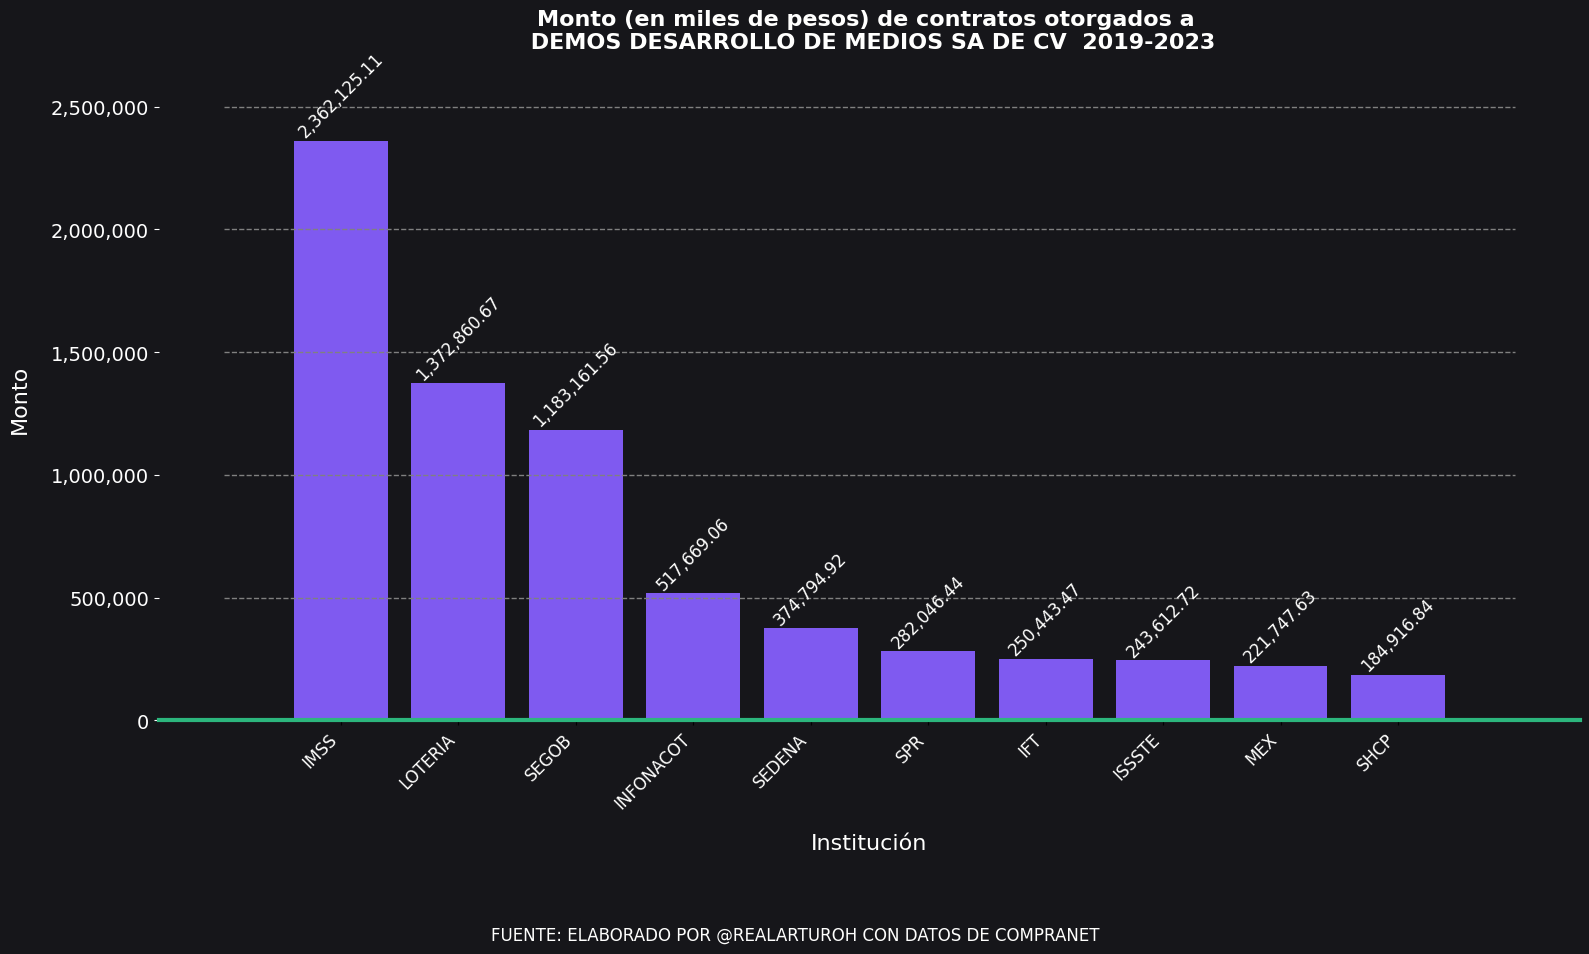

In [49]:
width = max(16, 0.5*len(instituciones))
height = width * (9/16)

fig, ax = plt.subplots(figsize=(width, height))
bars = ax.bar(instituciones, importe, color='#7f5af0')

ax.set_title(f"Monto (en miles de pesos) de contratos otorgados a \n {proveedor}  2019-2023", fontsize=16, pad=20, fontweight='bold', color='#fffffe')
ax.set_xlabel("Institución", fontsize=16, labelpad=15, color='#fffffe')
ax.set_ylabel("Monto", fontsize=16, labelpad=15, color='white')

ax.xaxis.set_major_locator(ticker.FixedLocator(range(len(instituciones))))
ax.set_xticklabels(instituciones, fontsize=12, rotation=45, color='#fffffe', ha="right")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='y', labelsize=14, colors='white')

ax.yaxis.set_major_locator(ticker.MultipleLocator(y_interval))
for y in np.arange(0, max(importe)+y_interval, y_interval):
    plt.hlines(y, xmin=-1, xmax=len(instituciones), colors='gray', linestyles='dashed', linewidth=1)

fig.set_facecolor('#16161a')
ax.set_facecolor('#16161a')

for spine in ['left', 'right', 'top']:
    ax.spines[spine].set_visible(False)

ax.spines['bottom'].set_linewidth(3)
ax.spines['bottom'].set_color('#2cb67d')

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.2f}".format(yval)
    ax.text(bar.get_x() + bar.get_width()/2, yval+0.1, formatted_yval, ha='center', va='bottom', fontsize=12, color='#fffffe', rotation=45)

plt.figtext(0.5, -0.08, "FUENTE: ELABORADO POR @REALARTUROH CON DATOS DE COMPRANET", ha="center", fontsize=12, color='#fffffe')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### Resultados de búsqueda por proveedor

In [50]:
# Asumiendo que 'buscar' es tu DataFrame original

# Creando el DataFrame prov_df con sumas de importes
prov_df = buscar.groupby(['proveedor_o_contratista', 'rfc']).agg({'importe':'sum'}).reset_index()
prov_df.sort_values(by='importe', ascending=False, inplace=True)

# Añadiendo la columna 'año_constitucion'
def convert_year(two_digit_year):
    if two_digit_year.isdigit():
        year_int = int(two_digit_year)
        if year_int > 23:
            return "19" + two_digit_year
        else:
            return "20" + two_digit_year
    else:
        return "unknown"

prov_df['año_constitucion'] = prov_df['rfc'].apply(lambda x: convert_year(str(x)[3:5]) if len(str(x)) >= 5 else "unknown")

# 1. Crear una tabla dinámica basada en el importe
pivot_df_importe = buscar.pivot_table(index='proveedor_o_contratista', columns='tipo_de_procedimiento', values='importe', aggfunc='sum', fill_value=0)

# 2. Convertir sumas en porcentajes
pivot_df_percentage = pivot_df_importe.divide(pivot_df_importe.sum(axis=1), axis=0) * 100
pivot_df_percentage.reset_index(inplace=True)

# 3. Fusionar con prov_df
prov_df = pd.merge(prov_df, pivot_df_percentage, on='proveedor_o_contratista', how='left')

# Opcional: mostrar el resultado
pd.options.display.float_format = '{:,}'.format

prov_df

,proveedor_o_contratista,rfc,importe,año_constitucion,ADJUDICACIÓN DIRECTA,CONTRATO ENTRE ENTES PUBLICOS,INVITACIÓN A CUANDO MENOS 3 PERSONAS,LICITACIÓN PÚBLICA,OTRAS CONTRATACIONES,Otro
0,DEMOS DESARROLLO DE MEDIOS SA DE CV,DDM840626PM2,"725,009,596.4085",1984,100.0,0.0,0.0,0.0,0.0,0.0
1,ESTUDIOS AZTECA SA DE CV,EAZ0311047B6,"558,986,769.28",2003,100.0,0.0,0.0,0.0,0.0,0.0
2,MEDIOS MASIVOS MEXICANOS SA DE CV,MMM920105QU1,"500,237,774.8498",1992,100.0,0.0,0.0,0.0,0.0,0.0
3,GRUPO TELEVISA S A B,GTE901219GK3,"407,259,767.82",1990,100.0,0.0,0.0,0.0,0.0,0.0
4,Televisa,TEL721214GK7,"391,499,359.5",1972,100.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2705,RAUL ALEJANDRO RIVERA SOLIS,XAXX010101000,"1,190.5",unknown,0.0,0.0,0.0,100.0,0.0,0.0
2706,FRANCISCO EDUARDO FRANCO RODRIGUEZ,XAXX010101000,485.0,unknown,0.0,0.0,100.0,0.0,0.0,0.0
2707,MARIA DE LOS ANGELES CRESCENCIO DAMIAN,XAXX010101000,100.699,unknown,100.0,0.0,0.0,0.0,0.0,0.0
2708,ESTRATEGIA EN SUMINISTROS INTERNACIONALES SA D...,ESI130515FI3,0.0,2013,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

prov_df2 = prov_df
prov_df2.sort_values(by='importe', ascending=True, inplace=True)
prov_df2 = prov_df2.tail(20)

proveedores = prov_df2['proveedor_o_contratista'].values
importe = prov_df2['importe'].values / 1e3  # Convertimos a miles


In [52]:
# Determine the order of magnitude of the max value
magnitude = 10 ** (math.floor(math.log10(max(importe))))

# Adjust the interval based on the magnitude
if max(importe) / magnitude < 2.5:
    x_interval = 0.5 * magnitude
elif max(importe) / magnitude < 5:
    x_interval = magnitude
else:
    x_interval = 2 * magnitude


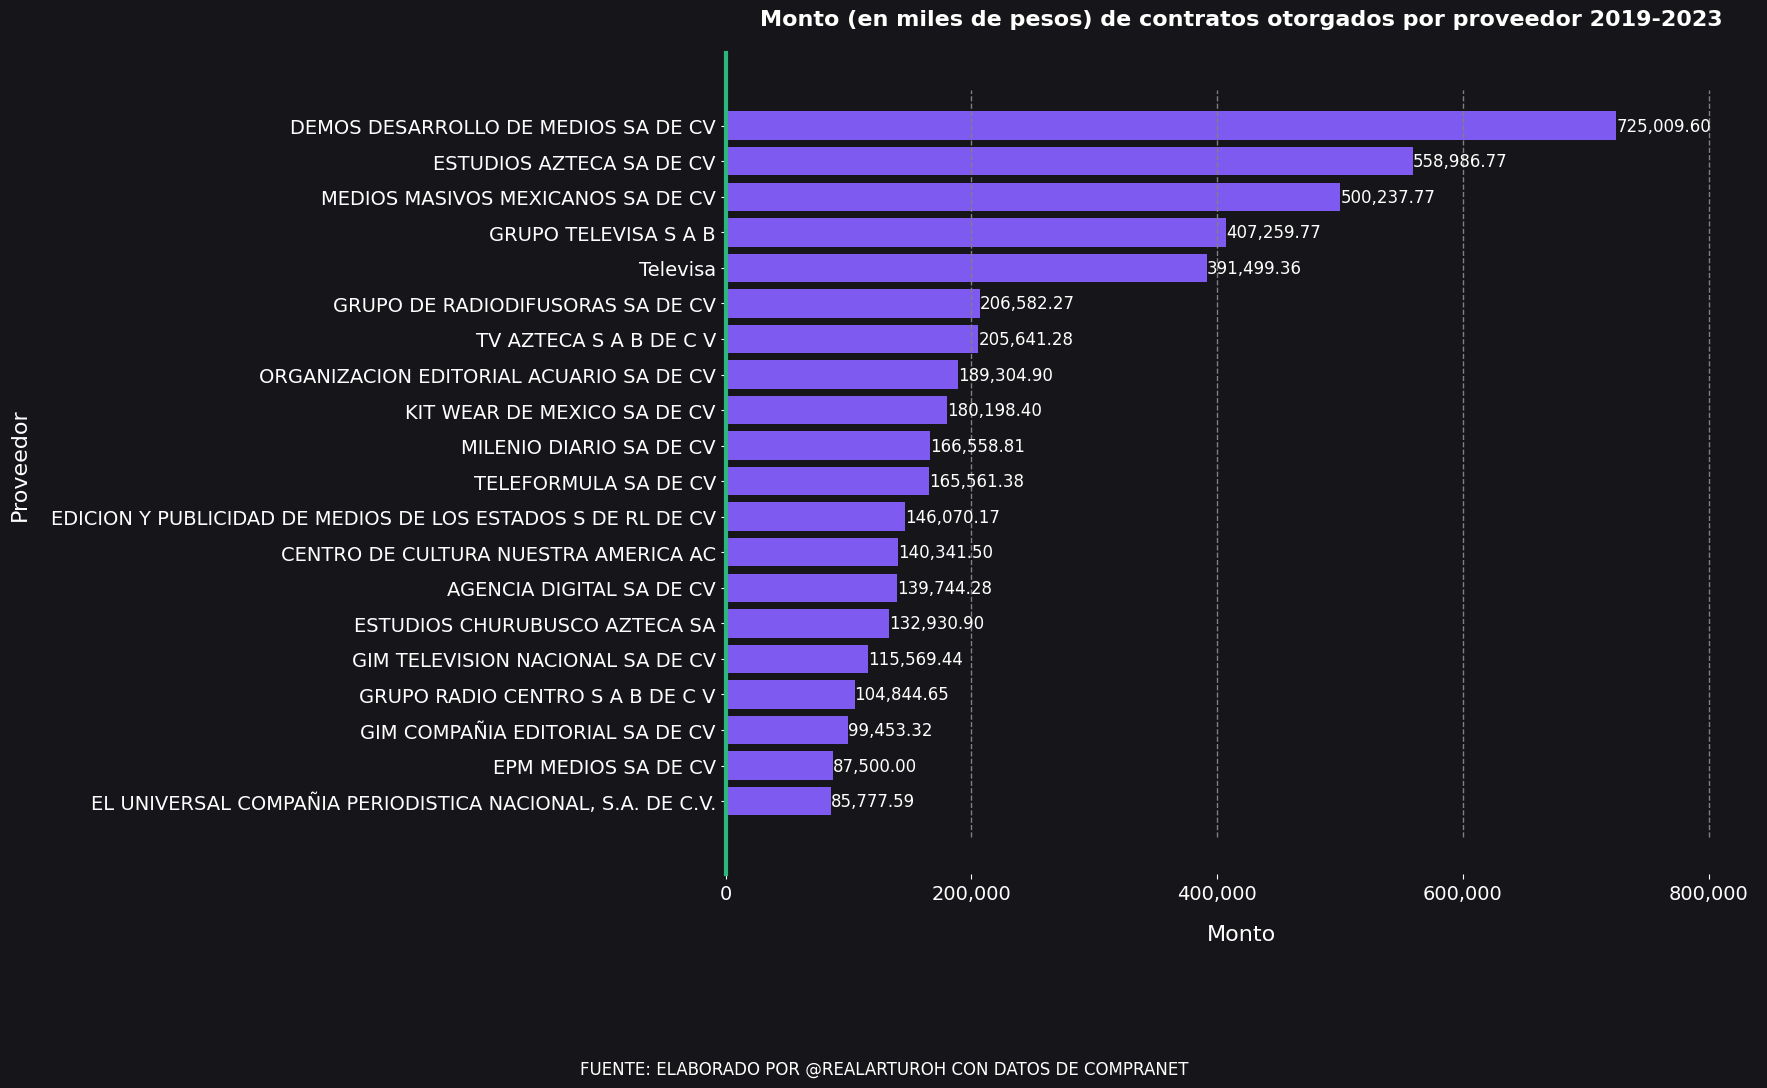

In [53]:
height = max(10, 0.5 * len(proveedores))
width = height * (16/9)

fig, ax = plt.subplots(figsize=(width, height))
bars = ax.barh(proveedores, importe, color='#7f5af0')

ax.set_title(f"Monto (en miles de pesos) de contratos otorgados por proveedor 2019-2023", fontsize=16, pad=20, fontweight='bold', color='#fffffe')
ax.set_ylabel("Proveedor", fontsize=16, labelpad=15, color='white')
ax.set_xlabel("Monto", fontsize=16, labelpad=15, color='white')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='x', labelsize=14, colors='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(x_interval))
for x in np.arange(0, max(importe)+x_interval, x_interval):
    plt.vlines(x, ymin=-1, ymax=len(proveedores), colors='gray', linestyles='dashed', linewidth=1)

fig.set_facecolor('#16161a')
ax.set_facecolor('#16161a')

for spine in ['bottom', 'right', 'top']:
    ax.spines[spine].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['left'].set_color('#2cb67d')
ax.tick_params(axis='y', labelsize=14, colors='white')

for bar in bars:
    xval = bar.get_width()
    formatted_xval = "{:,.2f}".format(xval)
    ax.text(xval + 0.1, bar.get_y() + bar.get_height()/2, formatted_xval, ha='left', va='center', fontsize=12, color='#fffffe')

plt.figtext(0.5, -0.08, "FUENTE: ELABORADO POR @REALARTUROH CON DATOS DE COMPRANET", ha="center", fontsize=12, color='#fffffe')
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

### Proveedores sospechosos


In [54]:
import datetime

# Año actual
current_year = datetime.datetime.now().year

# Función para calcular la probabilidad de sospecha
def calculate_suspicion(row):
    suspicion_score = 0

    # Si la empresa se constituyó en los últimos 5 años
    if row['año_constitucion'] != 'unknown' and (current_year - int(row['año_constitucion'])) <= 5:
        suspicion_score += 0.5

    # Obtener los valores para "ADJUDICACIÓN DIRECTA", "INVITACIÓN A CUANDO MENOS 3 PERSONAS", y "OTRO", o 0 si no existen
    adjudicacion_directa = row.get('ADJUDICACIÓN DIRECTA', 0)
    invitacion_tres_personas = row.get('INVITACIÓN A CUANDO MENOS 3 PERSONAS', 0)
    other_value = row.get('OTRO', 0)

    # Si más del 50% de su importe proviene de "ADJUDICACIÓN DIRECTA" o "INVITACIÓN A CUANDO MENOS 3 PERSONAS"
    if adjudicacion_directa + invitacion_tres_personas + other_value > 50:
        suspicion_score += 0.5

    return suspicion_score


# Aplicar la función para calcular la probabilidad de sospecha
prov_df['probabilidad_sospecha'] = prov_df.apply(calculate_suspicion, axis=1)

# Filtrar los proveedores sospechosos
suspicious_providers = prov_df[prov_df['probabilidad_sospecha'] >= 0.5]

# Seleccionar los 20 proveedores sospechosos que más han ganado
top_20_suspicious_providers_df = suspicious_providers.nlargest(20, 'importe')

# Resultado
top_20_suspicious_providers_df


,proveedor_o_contratista,rfc,importe,año_constitucion,ADJUDICACIÓN DIRECTA,CONTRATO ENTRE ENTES PUBLICOS,INVITACIÓN A CUANDO MENOS 3 PERSONAS,LICITACIÓN PÚBLICA,OTRAS CONTRATACIONES,Otro,probabilidad_sospecha
0,DEMOS DESARROLLO DE MEDIOS SA DE CV,DDM840626PM2,"725,009,596.4085",1984,100.0,0.0,0.0,0.0,0.0,0.0,0.5
1,ESTUDIOS AZTECA SA DE CV,EAZ0311047B6,"558,986,769.28",2003,100.0,0.0,0.0,0.0,0.0,0.0,0.5
2,MEDIOS MASIVOS MEXICANOS SA DE CV,MMM920105QU1,"500,237,774.8498",1992,100.0,0.0,0.0,0.0,0.0,0.0,0.5
3,GRUPO TELEVISA S A B,GTE901219GK3,"407,259,767.82",1990,100.0,0.0,0.0,0.0,0.0,0.0,0.5
4,Televisa,TEL721214GK7,"391,499,359.5",1972,100.0,0.0,0.0,0.0,0.0,0.0,0.5
5,GRUPO DE RADIODIFUSORAS SA DE CV,GRA9406213L3,"206,582,267.9",1994,100.0,0.0,0.0,0.0,0.0,0.0,0.5
6,TV AZTECA S A B DE C V,TAZ960904V78,"205,641,277.226",1996,100.0,0.0,0.0,0.0,0.0,0.0,0.5
7,ORGANIZACION EDITORIAL ACUARIO SA DE CV,OEA880217E31,"189,304,896.27",1988,100.0,0.0,0.0,0.0,0.0,0.0,0.5
9,MILENIO DIARIO SA DE CV,MDI991214A74,"166,558,814.586",1999,100.0,0.0,0.0,0.0,0.0,0.0,0.5
10,TELEFORMULA SA DE CV,TEL990629JR9,"165,561,380.07",1999,100.0,0.0,0.0,0.0,0.0,0.0,0.5


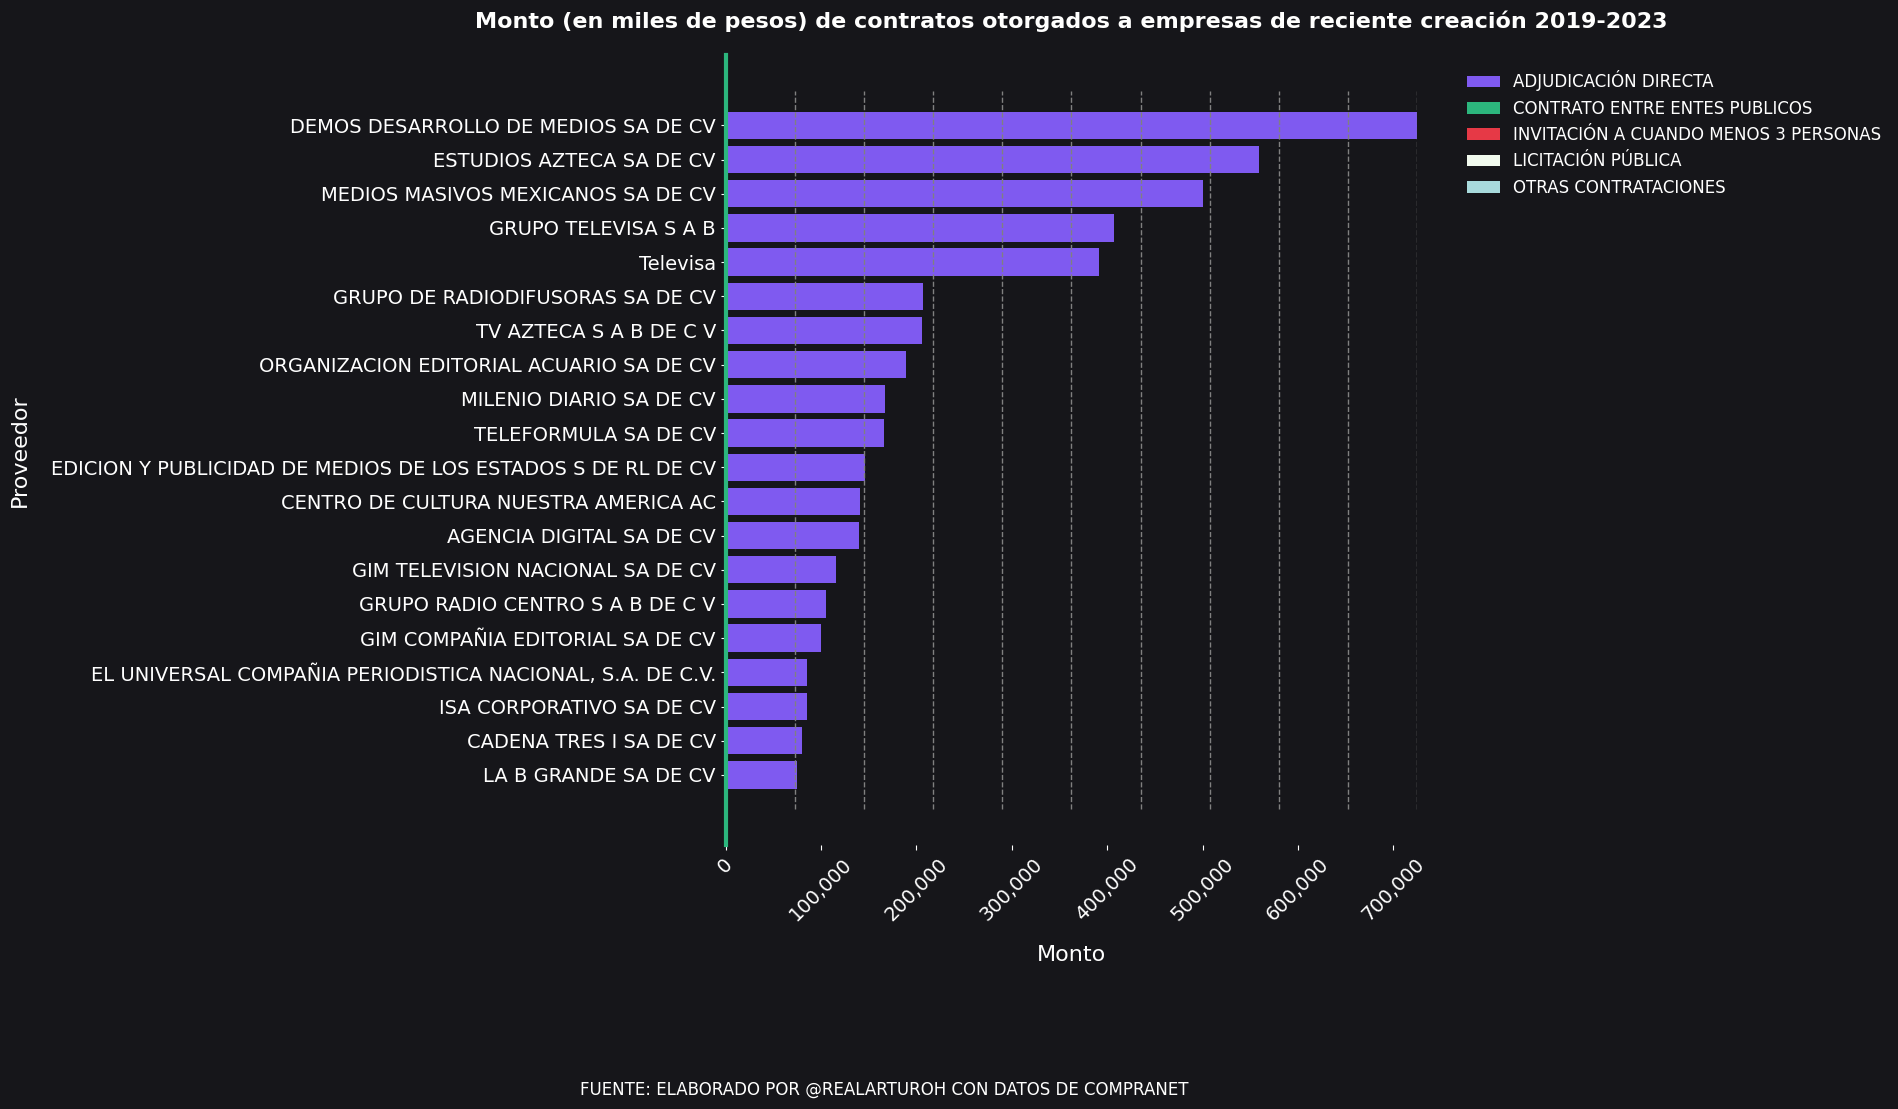

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

top20df = top_20_suspicious_providers_df.sort_values(by='importe', ascending=True)
top20df['importe'] = top20df['importe']/1000

# Datos
proveedores = top20df['proveedor_o_contratista'].tolist()
tipos_procedimiento = ['ADJUDICACIÓN DIRECTA', 'CONTRATO ENTRE ENTES PUBLICOS', 'INVITACIÓN A CUANDO MENOS 3 PERSONAS', 'LICITACIÓN PÚBLICA', 'OTRAS CONTRATACIONES', 'OTRO']

# Calcular los importes por tipo de procedimiento en función de los porcentajes y el importe total
colors = ['#7f5af0', '#2cb67d', '#e63946', '#f1faee', '#a8dadc', '#457b9d']

data_procedimientos = []
tipos_presentes = []
colores_presentes = []
for i, tipo in enumerate(tipos_procedimiento):
    if tipo in top20df.columns: # Verifica si el tipo de procedimiento existe en el DataFrame
        importe_tipo = (top20df[tipo] / 100) * top20df['importe']
        data_procedimientos.append(importe_tipo.values)
        tipos_presentes.append(tipo)
        colores_presentes.append(colors[i % len(colors)])


# Tamaño de la figura
height = max(10, 0.5 * len(proveedores))
width = height * (16/9)

fig, ax = plt.subplots(figsize=(width, height))

# Generar las barras apiladas
bars = []
for i, data in enumerate(data_procedimientos):
    bars.append(ax.barh(proveedores, data, left=[sum(data_procedimientos[j][k] for j in range(i)) for k in range(len(data))], color=colores_presentes[i]))


# Configuración del gráfico
ax.set_title(f"Monto (en miles de pesos) de contratos otorgados a empresas de reciente creación 2019-2023", fontsize=16, pad=20, fontweight='bold', color='#fffffe')



ax.set_ylabel("Proveedor", fontsize=16, labelpad=15, color='white')
ax.set_xlabel("Monto", fontsize=16, labelpad=15, color='white')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='x', labelsize=14, colors='white', rotation=45)
x_interval = (top20df['importe'].max() / 10)
for x in np.arange(0, top20df['importe'].max() + x_interval, x_interval):
    plt.vlines(x, ymin=-1, ymax=len(proveedores), colors='gray', linestyles='dashed', linewidth=1)
fig.set_facecolor('#16161a')
ax.set_facecolor('#16161a')
for spine in ['bottom', 'right', 'top']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['left'].set_color('#2cb67d')
ax.tick_params(axis='y', labelsize=14, colors='white')
legend = ax.legend(bars, tipos_presentes, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left') # Usa los tipos de procedimiento presentes
frame = legend.get_frame()
frame.set_alpha(0)
for text in legend.get_texts():
    text.set_color('white')
    
plt.figtext(0.5, -0.1, "FUENTE: ELABORADO POR @REALARTUROH CON DATOS DE COMPRANET", ha="center", fontsize=12, color='#fffffe')
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.show()
